**Vamos experimentar agora o algoritmo Decision Tree?**

In [13]:
!pip -q install yellowbrick

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pickle
with open('titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**



> **Vamos testar o modelo?**



In [5]:
modelo.fit(X_treino, y_treino)
previsoes = modelo.predict(X_teste)

In [6]:
previsoes

array(['não', 'não', 'não', 'não', 'sim', 'sim', 'sim', 'sim', 'não',
       'não', 'não', 'não', 'não', 'sim', 'não', 'sim', 'sim', 'não',
       'não', 'não', 'não', 'não', 'não', 'não', 'não', 'não', 'não',
       'não', 'não', 'sim', 'não', 'sim', 'sim', 'não', 'não', 'não',
       'sim', 'não', 'não', 'sim', 'não', 'sim', 'sim', 'não', 'não',
       'não', 'não', 'não', 'sim', 'sim', 'sim', 'sim', 'não', 'sim',
       'sim', 'não', 'não', 'sim', 'sim', 'não', 'não', 'não', 'sim',
       'sim', 'sim', 'não', 'sim', 'sim', 'não', 'não', 'não', 'não',
       'sim', 'não', 'sim', 'não', 'sim', 'não', 'sim', 'não', 'sim',
       'não', 'não', 'não', 'não', 'não', 'sim', 'não', 'sim', 'sim',
       'sim', 'não', 'não', 'sim', 'não', 'sim', 'não', 'não', 'sim',
       'sim', 'não', 'não', 'não', 'sim', 'sim', 'não', 'sim', 'não',
       'sim', 'sim', 'não', 'sim', 'sim', 'não', 'sim', 'não', 'sim',
       'sim', 'não', 'não', 'não', 'sim', 'não', 'não', 'não', 'sim',
       'sim', 'não',



> **Será se o modelo acertou?**



In [7]:
y_teste

1148    não
1049    não
982     não
808     não
1195    sim
       ... 
572     sim
140     não
1182    sim
312     não
199     não
Name: Survived, Length: 262, dtype: object

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8435114503816794

In [9]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[141,  18],
       [ 23,  80]])

c:\Users\diasf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8435114503816794

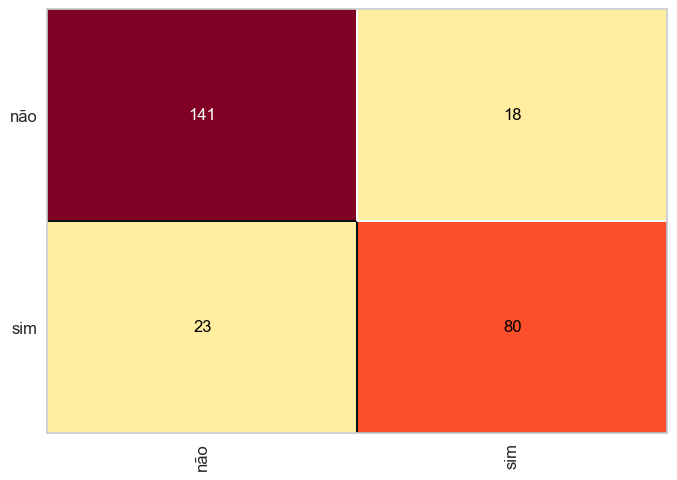

In [10]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [11]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         não       0.86      0.89      0.87       159
         sim       0.82      0.78      0.80       103

    accuracy                           0.84       262
   macro avg       0.84      0.83      0.83       262
weighted avg       0.84      0.84      0.84       262



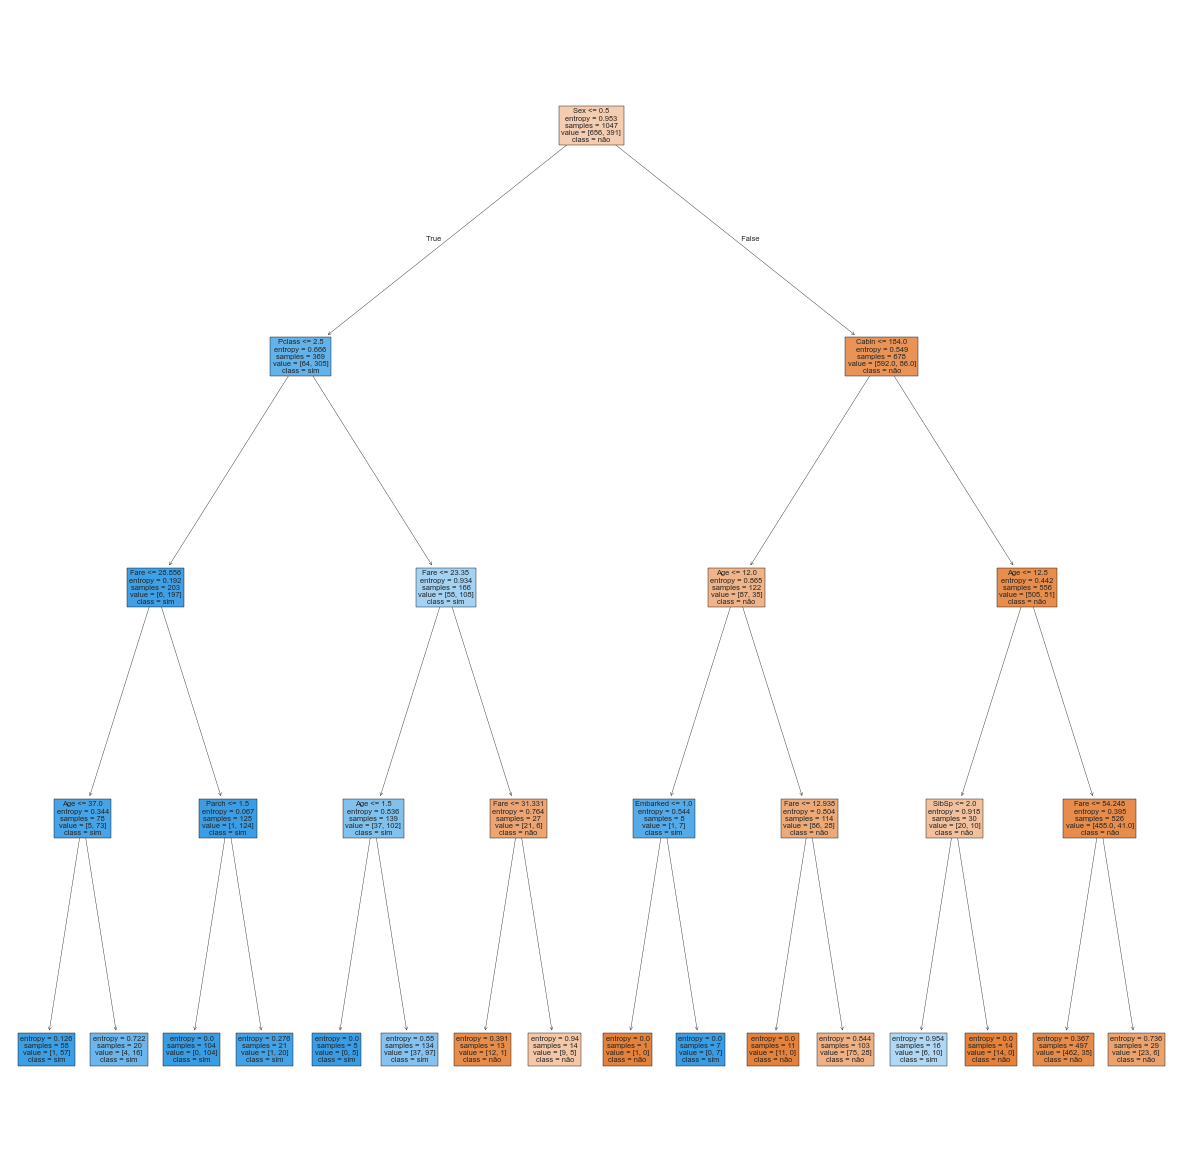

In [17]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

# Convertendo os nomes das classes para string
class_names_str = [str(cls) for cls in modelo.classes_]

tree.plot_tree(modelo, feature_names=previsores, class_names=class_names_str, filled=True);

In [ ]:
from sklearn.tree import _tree
X_prev = base_encoded.drop(base_encoded.columns[0], axis=1)
def extrair_regras(modelo, feature_names):
    tree_ = modelo.tree_
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            print(f"{indent}Se ({name} <= {threshold:.2f}):")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}Senão ({name} > {threshold:.2f}):")
            recurse(tree_.children_right[node], depth + 1)
        else:
            valores = tree_.value[node][0]
            classe = valores.argmax()  # Classe com maior probabilidade
            print(f"{indent}-> Classe: {classe} ({valores})")

    recurse(0, 0)

# Exemplo de uso (supondo que 'modelo' seja o DecisionTree treinado e 'X_prev' contenha os atributos)
extrair_regras(modelo, feature_names=X_prev.columns.tolist())

NameError: name 'X_prev' is not defined